#**New York City Taxi Tip Prediction**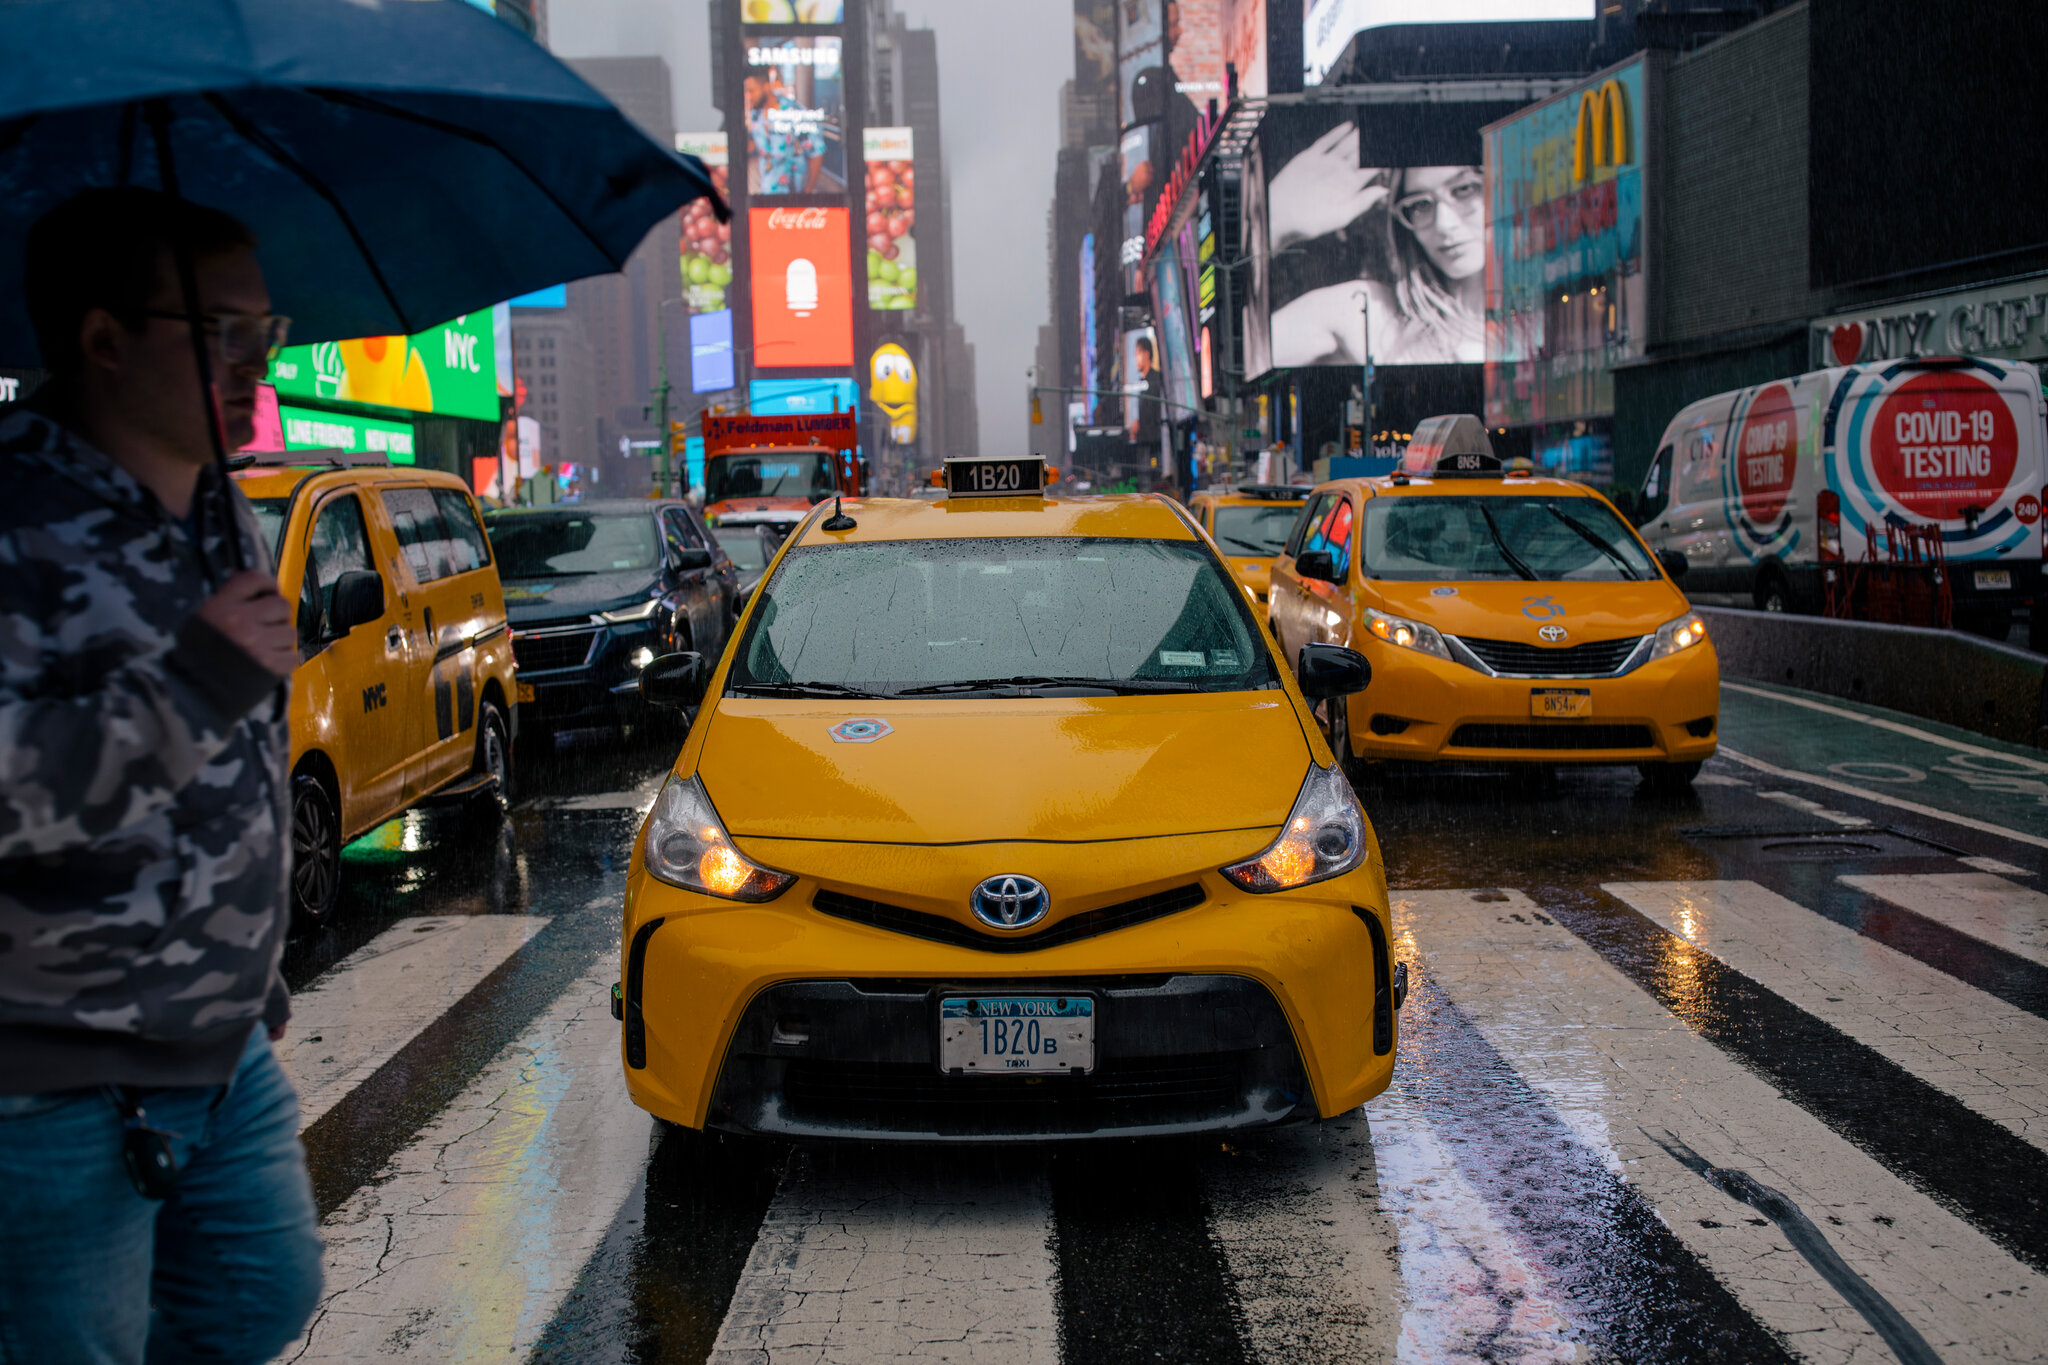

#**BLUF**

Our project is making great progress in developing a predictive model to boost taxi drivers' tip earnings.The model effectively predicts generous tips but tends to generate more false positives. Despite this, its high precision and recall indicate reliability. VendorID_2 is the most important predictors, indicating that different suppliers have a significant impact on tipping behavior. Possible reasons include differences in the quality of service provided by different providers, the service attitudes of drivers, or the impact of different providers' billing and payment systems on passenger behavior. The time characteristics of night, rushinevening and morning indicate that tipping behavior is significantly different in different time periods of the day. Night time and rush hour affect passengers' mood and willingness to pay. passenger_count is also an important predictors, indicating that tipping behavior will differ when multiple people ride. Further analysis is needed to understand VendorID's impact. Adjusting the model's threshold could enhance performance and driver experience.


# Business Problem
The objective is to develop a predictive model that can effectively increase revenue for taxi cab drivers by identifying optimal strategies for maximizing tips. The model will leverage historical data to predict whether a passenger is likely to be a generous tipper based on various trip attributes and customer behavior.

The successful implementation of this predictive model can be utilized to:

-Guide drivers in prioritizing routes and passengers that are more likely to result in higher tips, thereby maximizing their earnings.
-Provide real-time insights to drivers, enabling them to adapt their service approach during the ride to potentially increase tip amounts.
-Assist taxi cab companies in optimizing driver incentives and reward programs to incentivize behaviors that lead to higher tips.

# Project Goal
The challenge is to leverage the available dataset to construct a robust predictive model using appropriate machine learning techniques. The model should accurately predict whether a passenger will be a generous tipper based on trip characteristics and other relevant factors.

# Metrics

We used precision, recall, F1 score, accuracy, and AUC (Area Under the ROC Curve), which are vital for evaluating classification models. Precision measures positive prediction accuracy, recall captures all positives, F1 balances precision and recall, accuracy indicates overall correctness, and AUC assesses model discrimination ability. These metrics collectively provide insights into the model's performance, crucial for assessing its effectiveness in practical applications.



# About the Data
The New York City Taxi and Limousine Commission (TLC) oversees the licensing and regulation of taxi cabs and for-hire vehicles in the city. With data sourced from over 200,000 licensees, it represents a vast network facilitating roughly one million trips daily. However, it's important to note that while this dataset serves educational purposes, it may not fully reflect the actual behaviors of taxi cab riders in New York City.

# Feature explanations
- MatchID: Identification number for the league match
- VendorID: Code indicating the TPEP provider that provided the record. (1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.)
- TPEP_pickup_datetime: Date and time when the meter was engaged.
- TPEP_dropoff_datetime: Date and time when the meter was disengaged.
- Passenger_count: Number of passengers in the vehicle. (Driver-entered value)
- Trip_distance: Elapsed trip distance in miles reported by the taximeter.
- PULocationID: TLC Taxi Zone in which the taximeter was engaged.
- DOLocationID: TLC Taxi Zone in which the taximeter was disengaged.
- RateCodeID: Final rate code in effect at the end of the trip. (1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride)
- Store_and_fwd_flag: Flag indicating whether the trip record was held in vehicle memory before being sent to the vendor. (Y= store and forward trip, N= not a store and forward trip)
- Payment_type: Numeric code signifying how the passenger paid for the trip. (1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip)
- Fare_amount: Time-and-distance fare calculated by the meter.
- Extra: Miscellaneous extras and surcharges. (Includes the 0.50 and 1 dollar rush hour and overnight charges)
- MTA_tax: 0.50 dollar MTA tax that is automatically triggered based on the metered rate in use.
- Improvement_surcharge: 0.30 dollar improvement surcharge assessed trips at the flag drop. (Began being levied in 2015)
- Tip_amount: Tip amount  automatically populated for credit card tips. (Cash tips are not included)
- Tolls_amount: Total amount of all tolls paid in the trip.
- Total_amount: Total amount charged to passengers. (Does not include cash tips)

# Libraries

In [158]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
from matplotlib.colors import ListedColormap

In [159]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

In [161]:
# LightGBM Library
!pip install lightgbm
from lightgbm import LGBMClassifier

In [162]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score

In [163]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

In [164]:
# mblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer

# DATA

In [165]:
# Load the dataset
df = pd.read_csv('Yellow_Taxi_Trip_Data.csv')
# Ensure that the data is a Series (extract the first column if it's the only data column)

# EDA

## Missing values

In [166]:
# check missing values
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

## Duplicates

In [167]:
# check duplicates
df.duplicated().sum()

0

In [168]:
# remove dups
df = df.drop_duplicates()

In [169]:
df.shape

(22699, 18)

In [170]:
df.size

408582

In [171]:
df.nunique()

Unnamed: 0               22699
VendorID                     2
tpep_pickup_datetime     22687
tpep_dropoff_datetime    22688
passenger_count              7
trip_distance             1545
RatecodeID                   6
store_and_fwd_flag           2
PULocationID               152
DOLocationID               216
payment_type                 4
fare_amount                185
extra                        6
mta_tax                      3
tip_amount                 742
tolls_amount                38
improvement_surcharge        3
total_amount              1369
dtype: int64

In [172]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

## Descriptive Statistics

In [173]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

## AutoViz Graph

    Since nrows is smaller than dataset, loading random sample of 2000 rows into pandas...
Shape of your Data Set loaded: (2000, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  3
    Number of Columns to Delete =  0
    18 Predictors classified...
        3 variable(s) removed since they were ID or low-information variables
        List

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,65654.000000,113456738.000000,Possible ID column: drop before modeling step.
VendorID,int64,0.000000,0,1.000000,2.000000,No issue
tpep_pickup_datetime,object,0.000000,100,,,Possible ID column: drop before modeling step.
tpep_dropoff_datetime,object,0.000000,100,,,Possible ID column: drop before modeling step.
passenger_count,int64,0.000000,0,1.000000,6.000000,Column has 204 outliers greater than upper bound (3.50) or lower than lower bound(-0.50). Cap them or remove them.
trip_distance,float64,0.000000,NA,0.000000,33.960000,Column has 224 outliers greater than upper bound (6.25) or lower than lower bound(-2.15). Cap them or remove them.
RatecodeID,int64,0.000000,0,1.000000,5.000000,Column has 53 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.
store_and_fwd_flag,object,0.000000,0,,,No issue
PULocationID,int64,0.000000,4,4.000000,264.000000,No issue
DOLocationID,int64,0.000000,6,1.000000,265.000000,No issue


Number of All Scatter Plots = 21


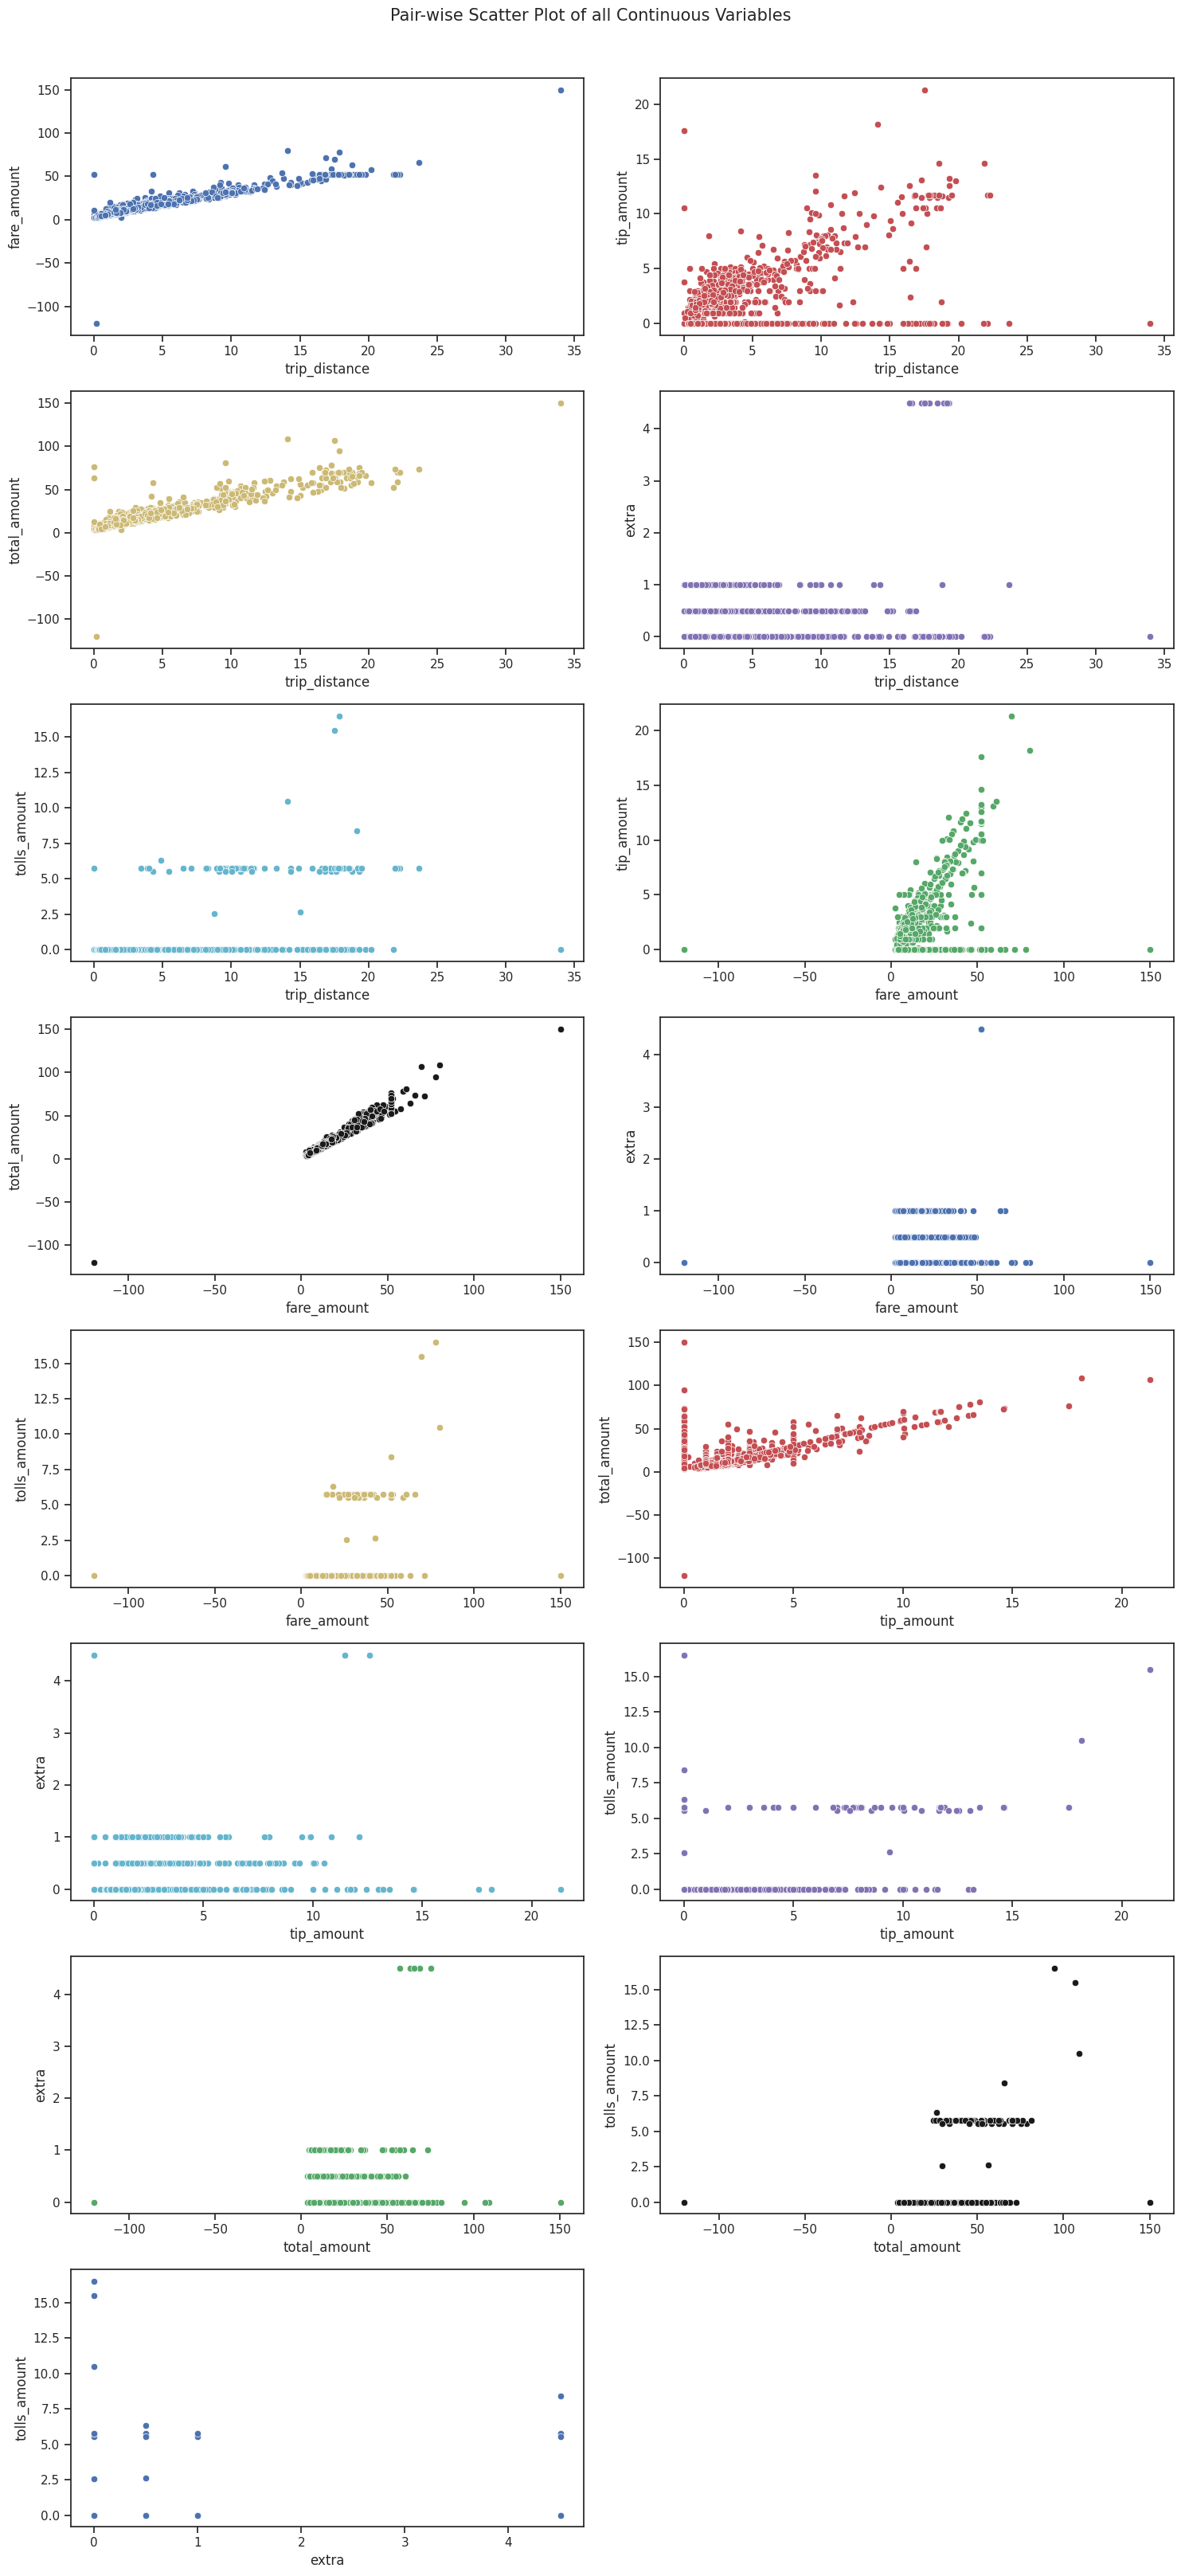

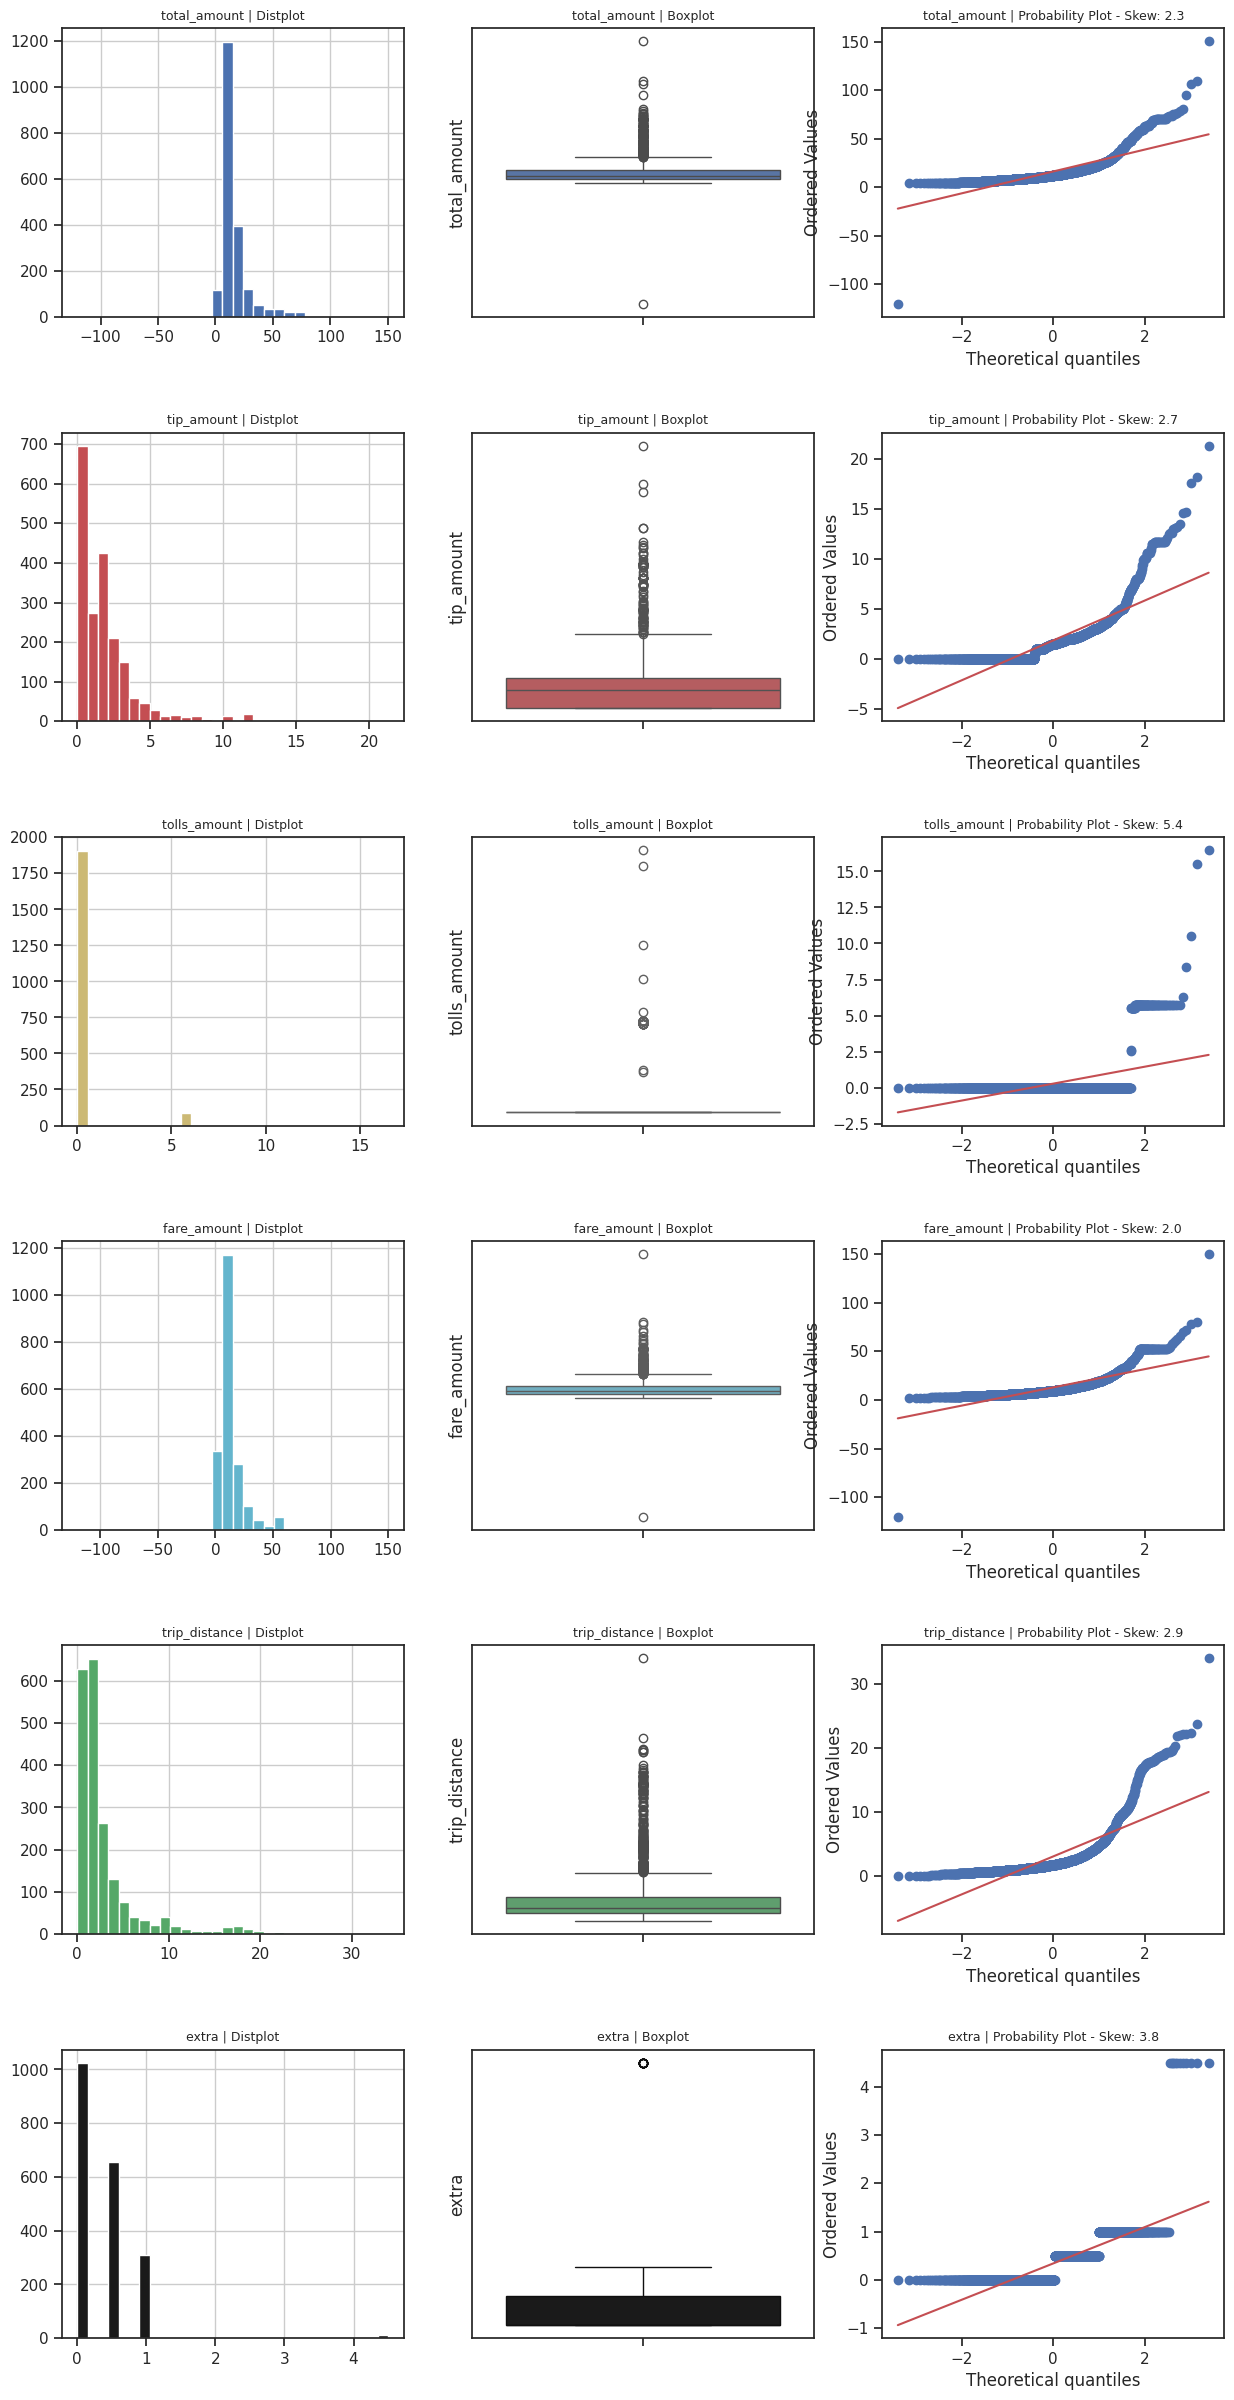

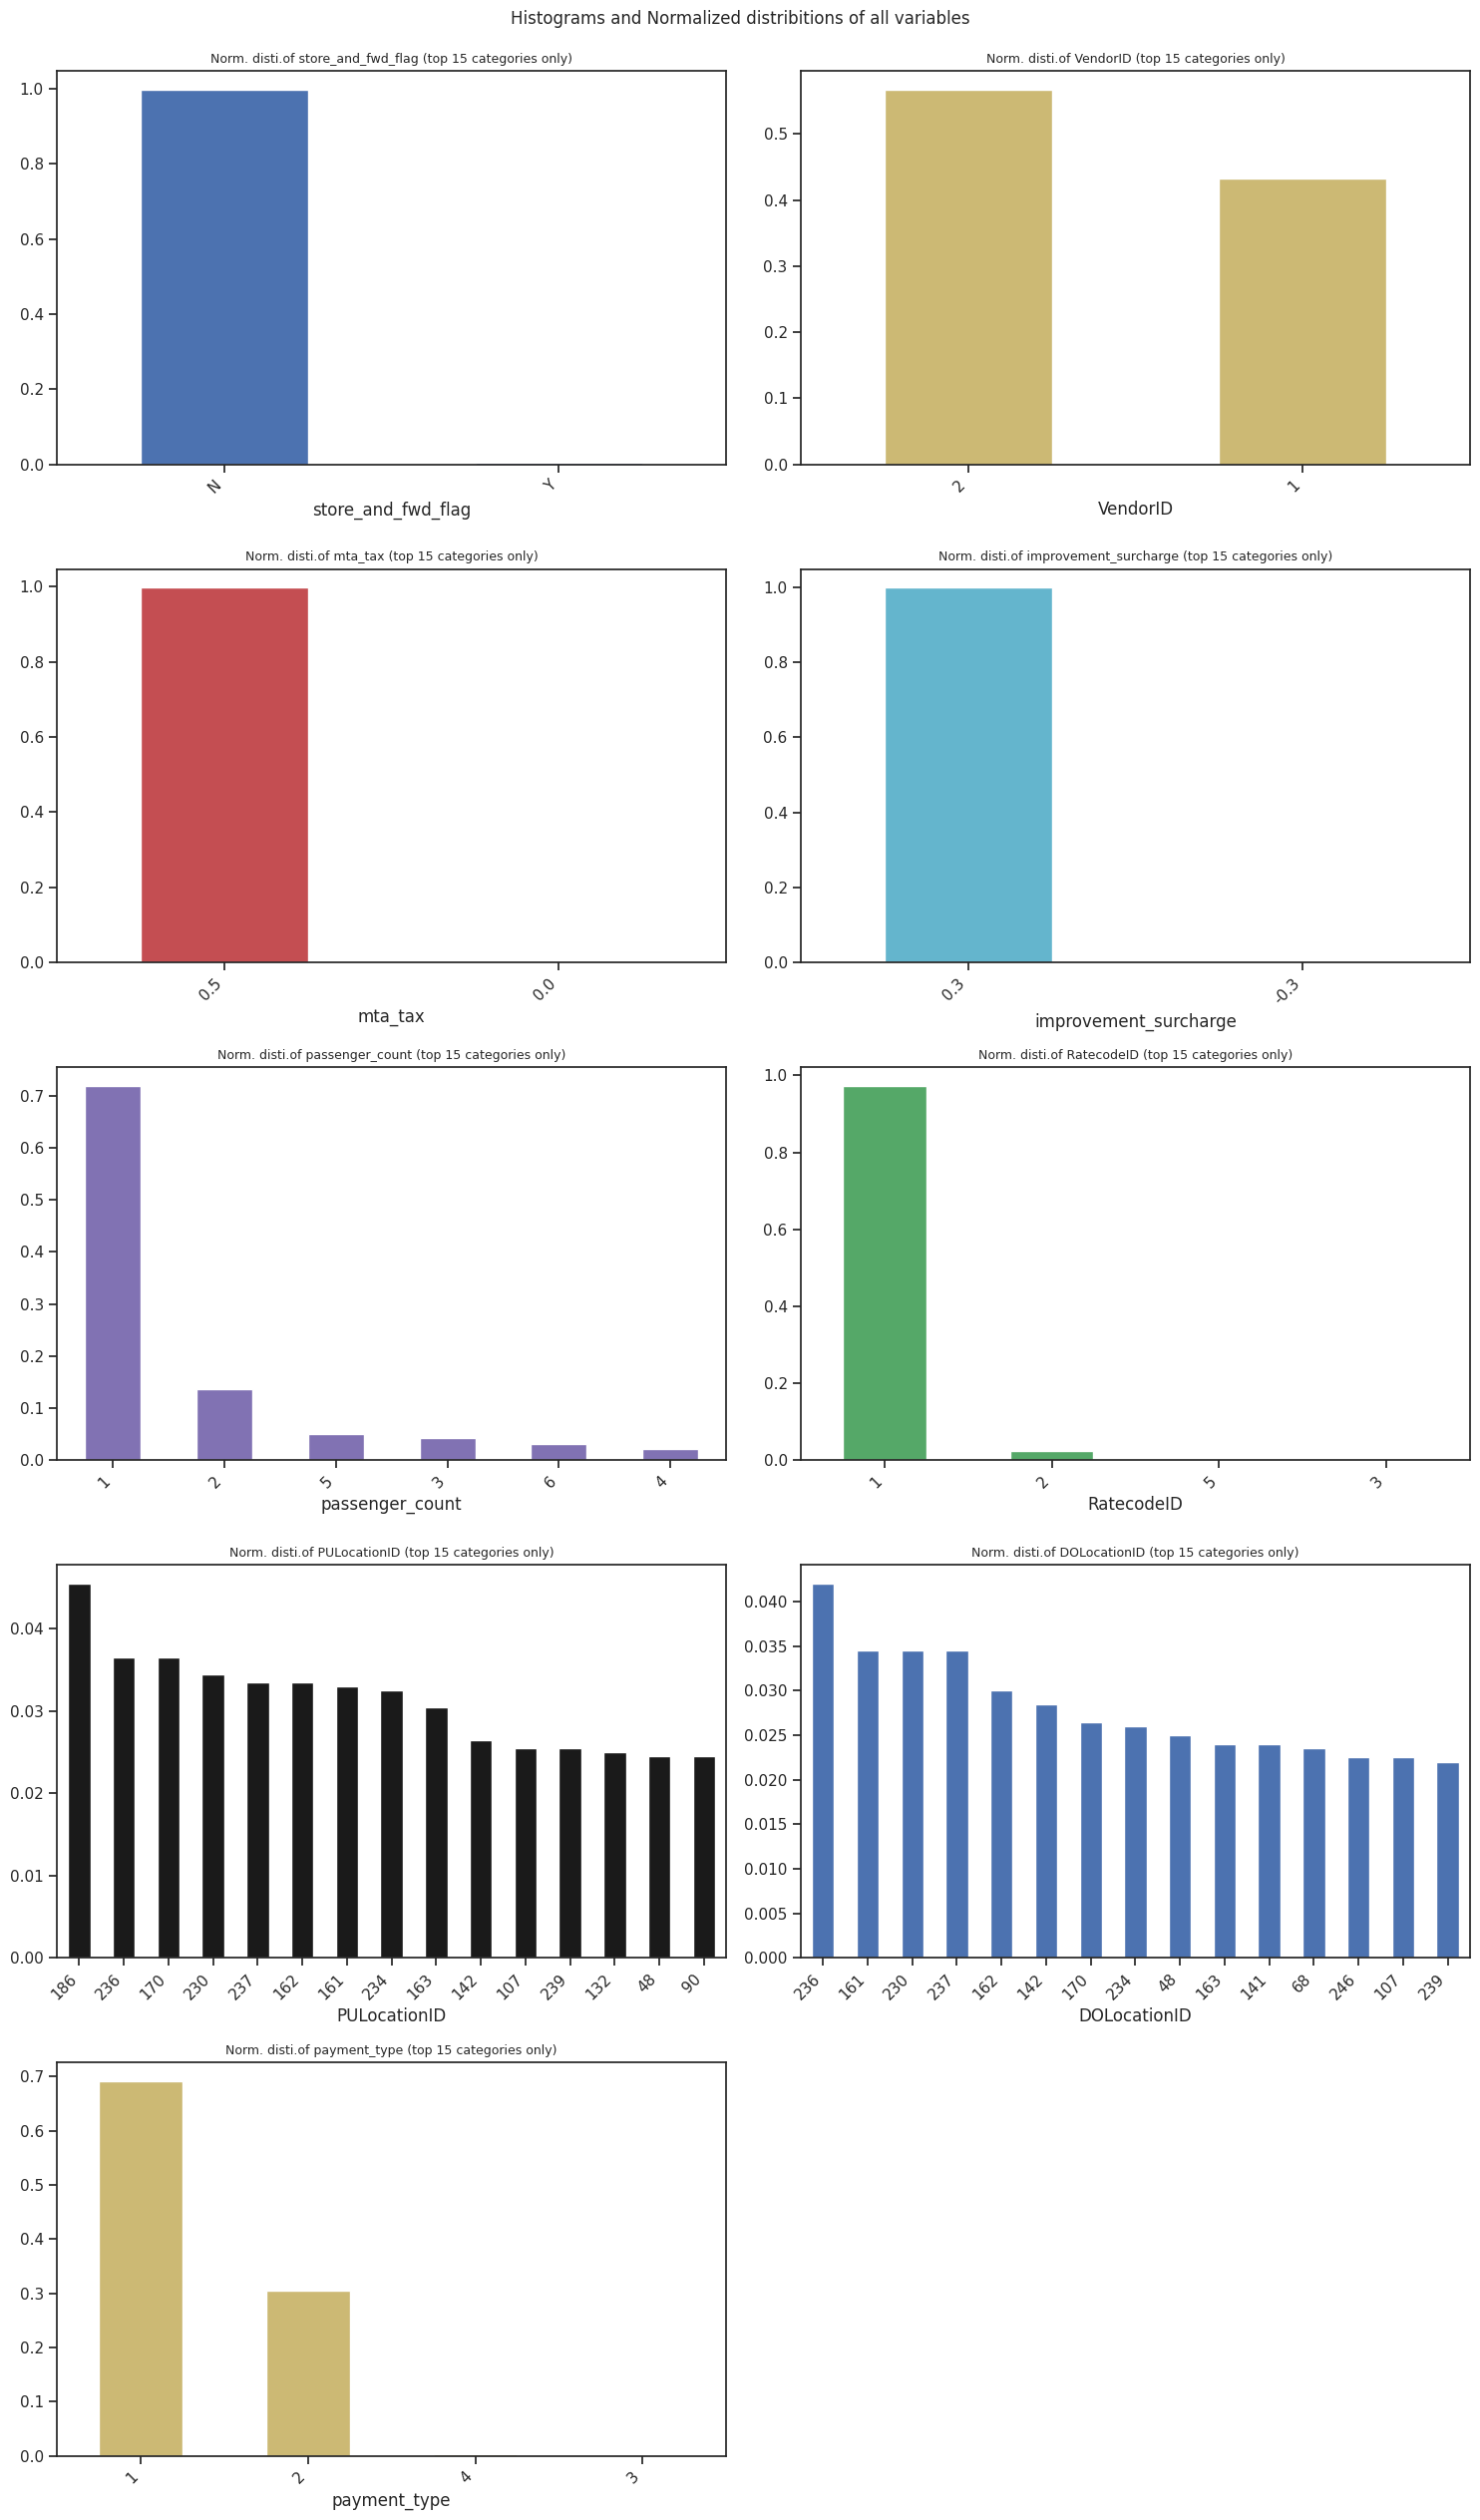

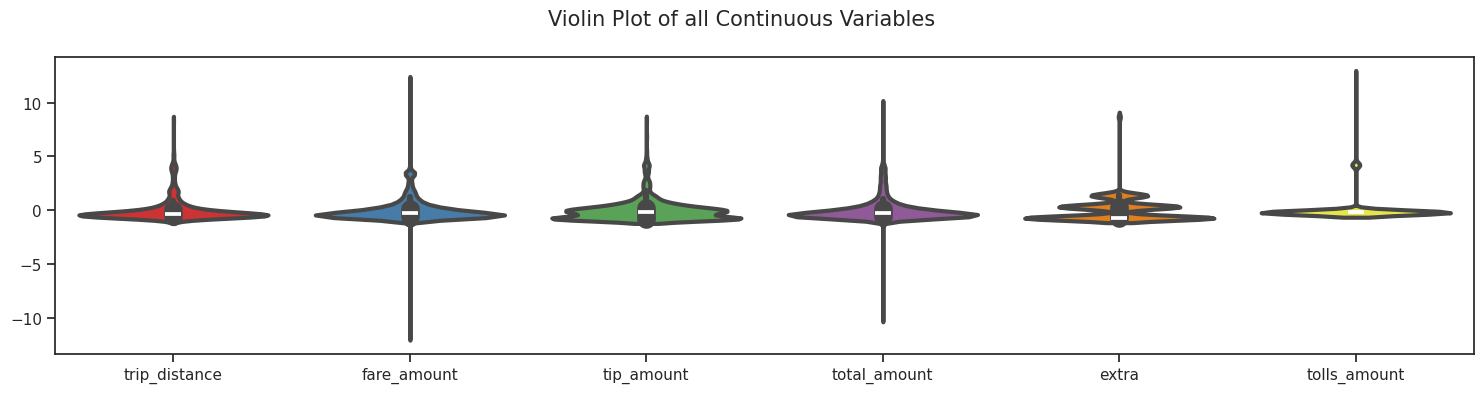

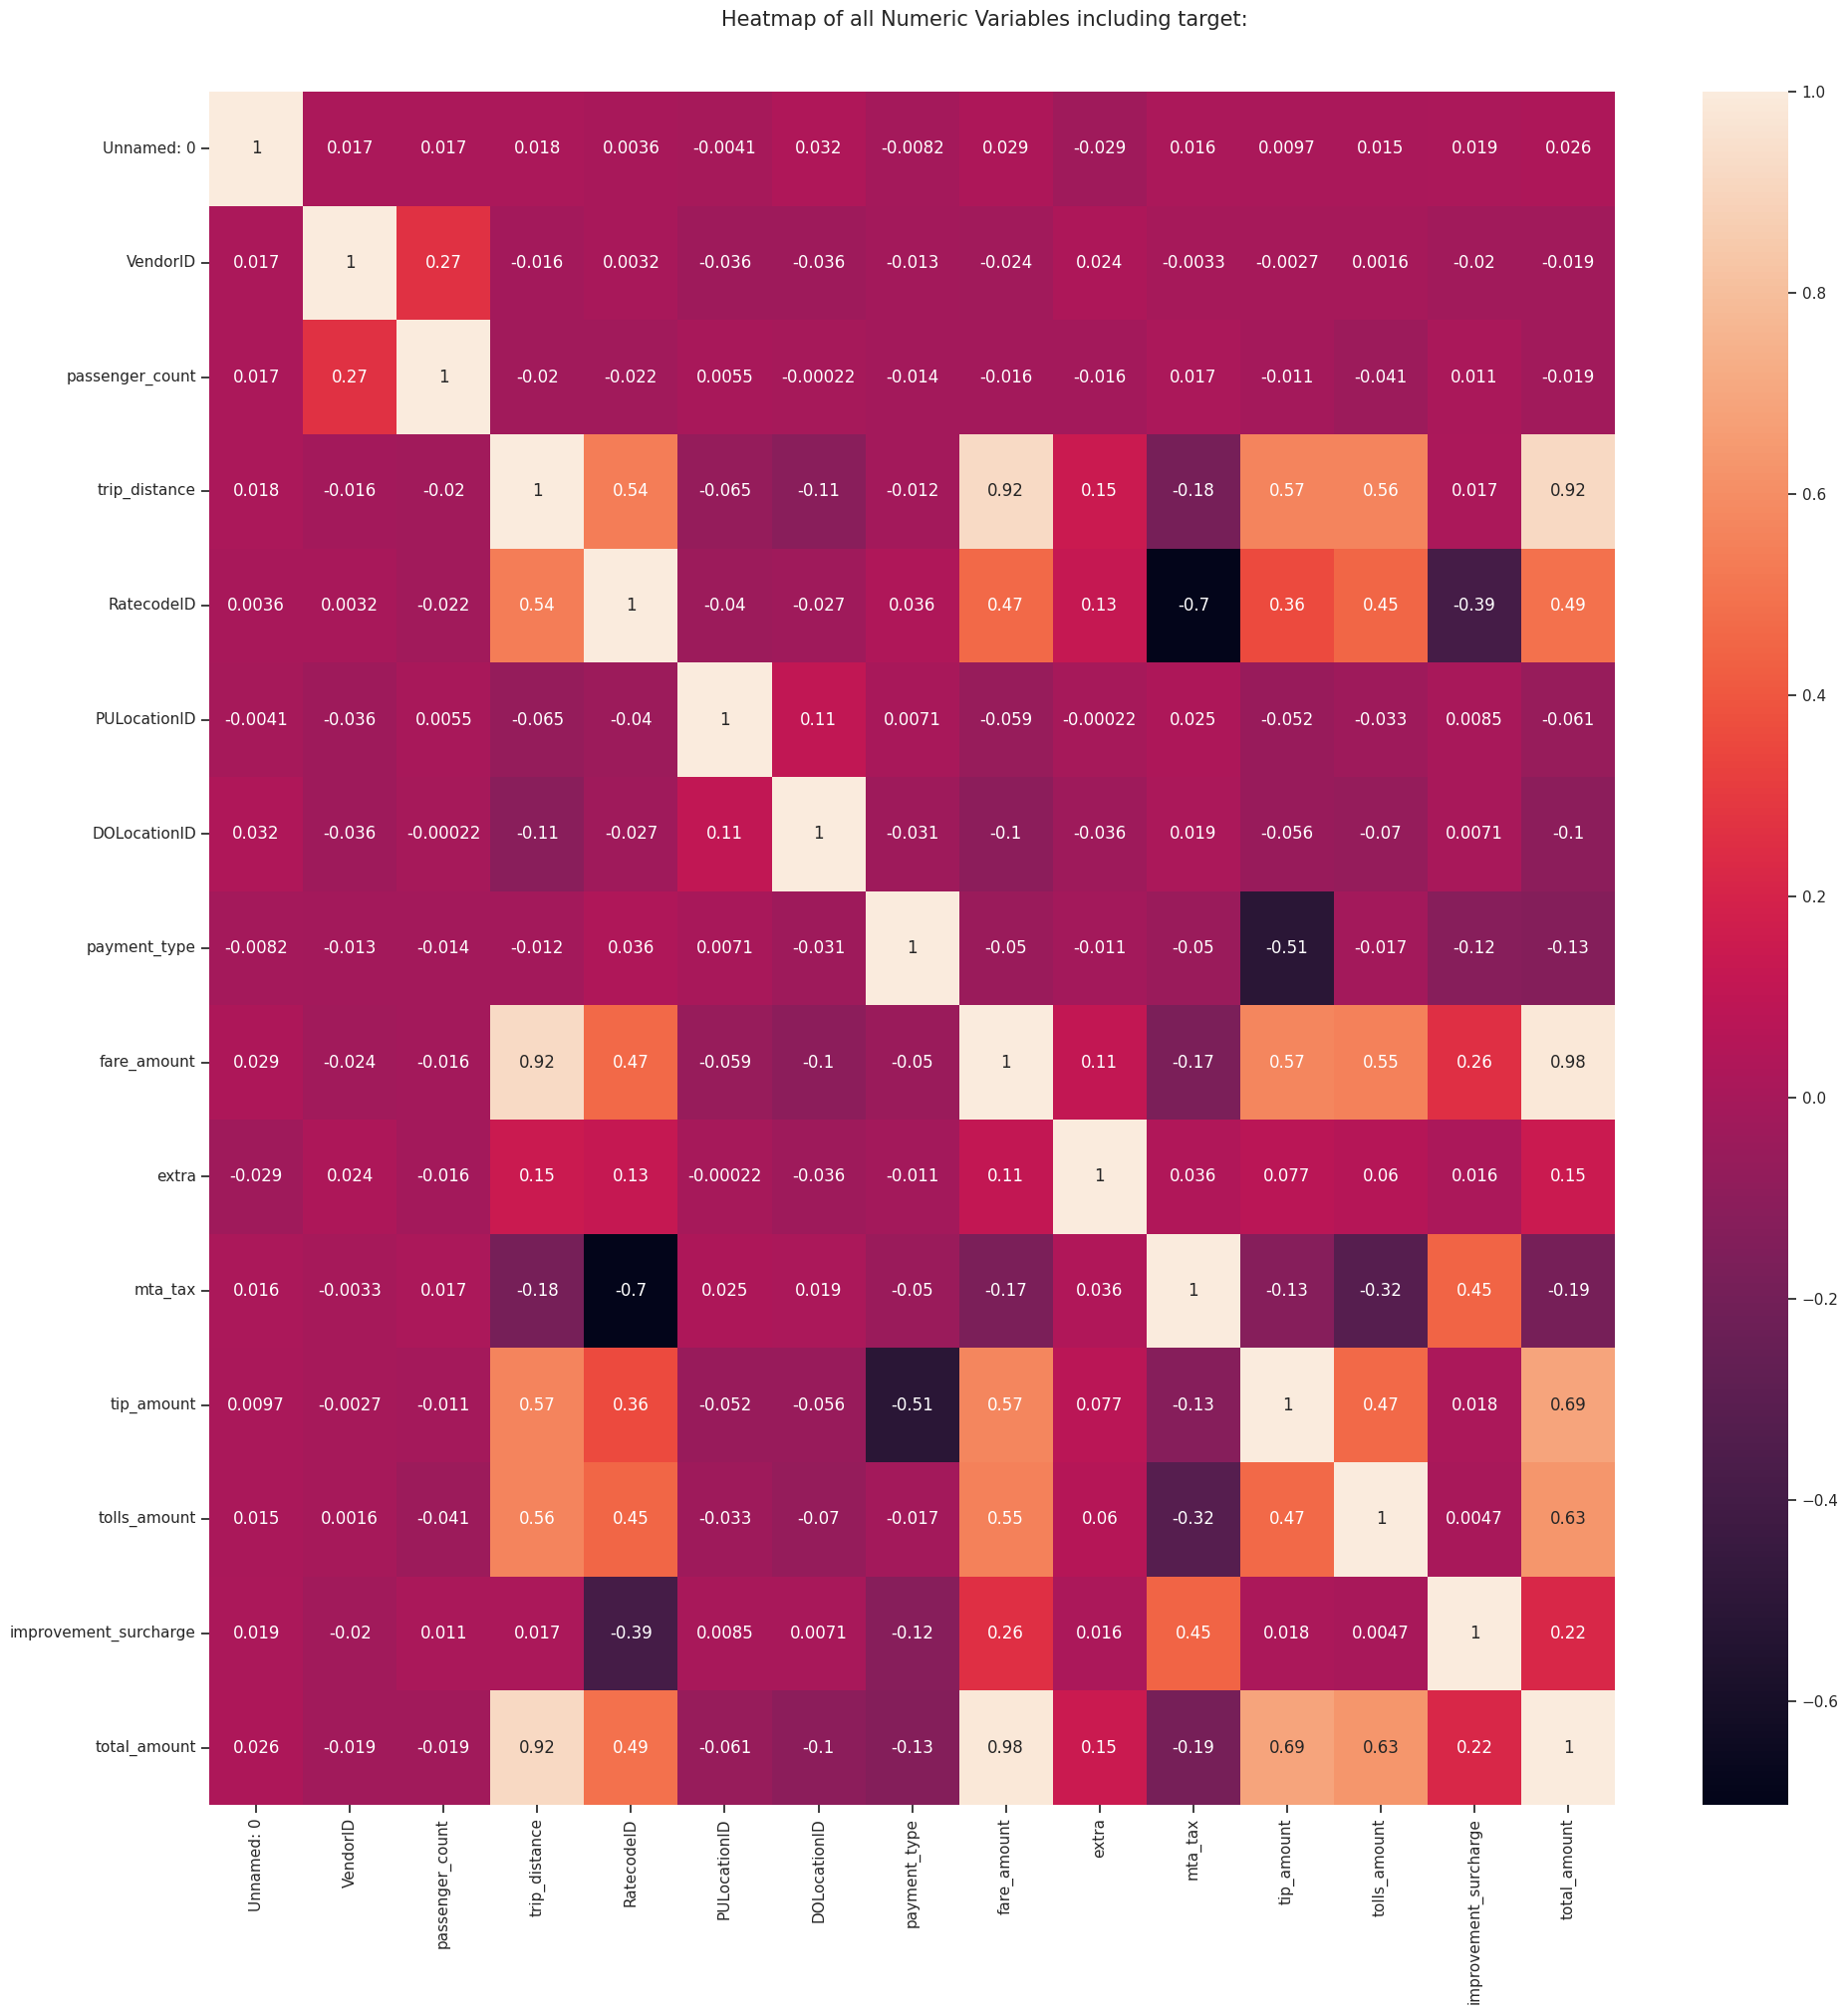

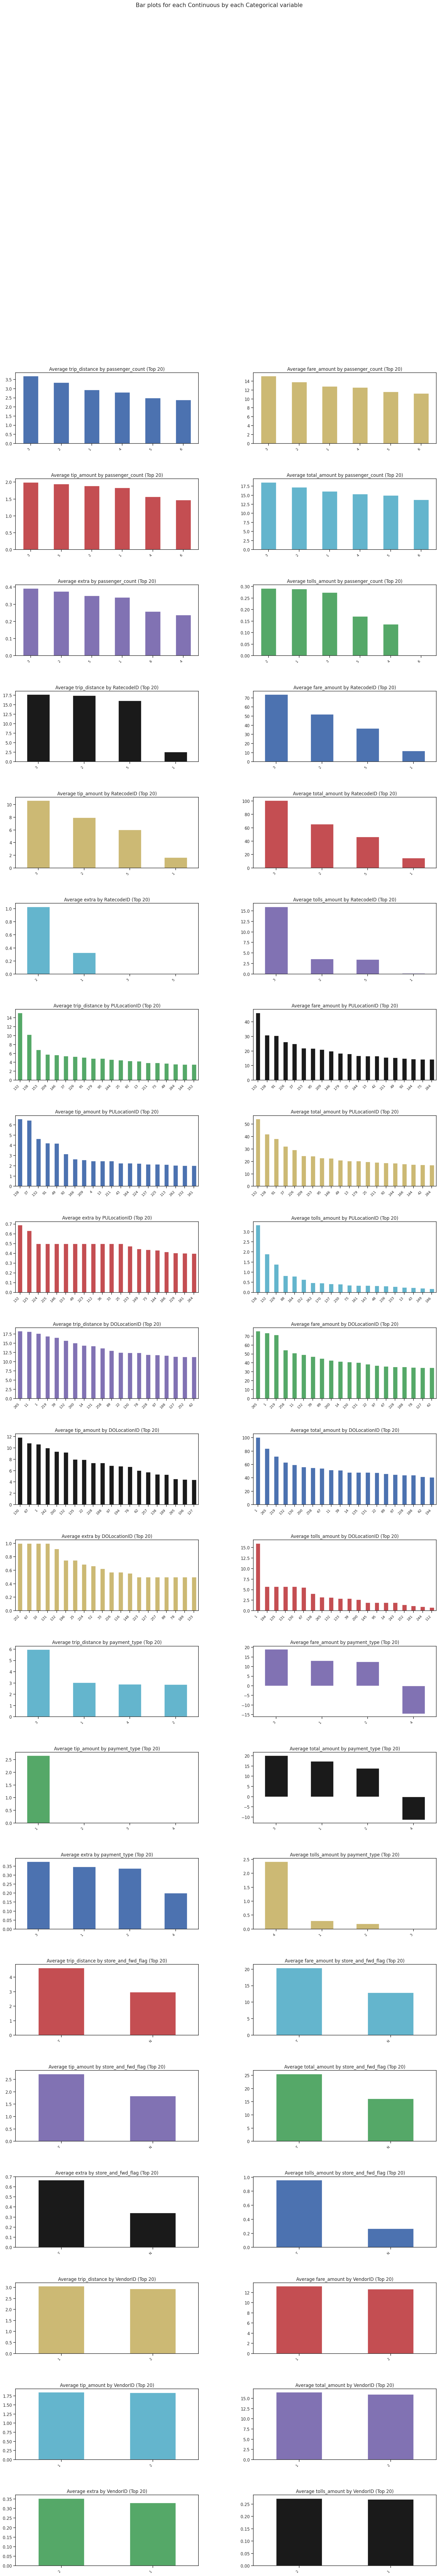

All Plots done
Time to run AutoViz = 31 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [175]:
# Get some graphs!
# create an AutoViz class
AV = AutoViz_Class()
# create charts
%matplotlib inline
dftc = AV.AutoViz(filename='', sep ='', dfte = df, header = 0,
verbose = 1, lowess = False, chart_format ='png', max_rows_analyzed = 2000, max_cols_analyzed = 30)

## Check balance

In [176]:
# count target to check dataset balance
df['tip_amount'].value_counts()

tip_amount
0.00      8057
1.00      1451
2.00       756
1.50       303
3.00       237
          ... 
10.21        1
200.00       1
0.25         1
11.41        1
14.84        1
Name: count, Length: 742, dtype: int64

## Mean tips by passenger count

In [177]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

# Data Pre-Processing

## Create Tip percentage

In [178]:
# Subset the data to isolate only customers who paid by credit card
df1 = df[df['payment_type']==1]

In [179]:
# Create tip % col
df1['tip_percentage'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

In [180]:
# Create 'generous' col (target)
df1['generousornot'] = df1['tip_percentage']
df1['generousornot'] = (df1['generousornot'] >= 0.2)
df1['generousornot'] = df1['generousornot'].astype(int)

## Create time of day columns

rushinmorning = [06:00–10:00)
morning = [10:00–16:00)
rushinevening = [16:00–20:00)
night = [20:00–06:00)

In [181]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [182]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

In [183]:
# Create 'rushinmorning' col
df1['rushinmorning'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'morning' col
df1['morning'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'rushinevening' col
df1['rushinevening'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'night' col
df1['night'] = df1['tpep_pickup_datetime'].dt.hour

In [184]:
# Define 'rushinmorning()' conversion function [06:00–10:00)
def rushinmorning(hour):
    if 6 <= hour['rushinmorning'] < 10:
        val = 1
    else:
        val = 0
    return val
# Apply 'rushinmorning' function to the 'rushinmorning' series
df1['rushinmorning'] = df1.apply(rushinmorning, axis=1)
df1['rushinmorning'].head()

0    1
1    0
2    1
3    0
5    0
Name: rushinmorning, dtype: int64

In [185]:
# Define 'morning()' conversion function [10:00–16:00)
def morning(hour):
    if 10 <= hour['morning'] < 16:
        val = 1
    else:
        val = 0
    return val
# Apply 'morning' function to the 'morning' series
df1['morning'] = df1.apply(morning, axis=1)

In [186]:
# Define 'rushinevening()' conversion function [16:00–20:00)
def rushinevening(hour):
    if 16 <= hour['rushinevening'] < 20:
        val = 1
    else:
        val = 0
    return val
# Apply 'rushinevening' function to the 'rushinevening' series
df1['rushinevening'] = df1.apply(rushinevening, axis=1)

In [187]:
# Define 'night()' conversion function [20:00–06:00)
def night(hour):
    if 20 <= hour['night'] < 24:
        val = 1
    elif 0 <= hour['night'] < 6:
        val = 1
    else:
        val = 0
    return val
# Apply 'night' function to the 'night' series
df1['night'] = df1.apply(night, axis=1)

## Create month column

In [189]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [190]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15265 non-null  int64         
 1   VendorID               15265 non-null  int64         
 2   tpep_pickup_datetime   15265 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  15265 non-null  datetime64[ns]
 4   passenger_count        15265 non-null  int64         
 5   trip_distance          15265 non-null  float64       
 6   RatecodeID             15265 non-null  int64         
 7   store_and_fwd_flag     15265 non-null  object        
 8   PULocationID           15265 non-null  int64         
 9   DOLocationID           15265 non-null  int64         
 10  payment_type           15265 non-null  int64         
 11  fare_amount            15265 non-null  float64       
 12  extra                  15265 non-null  float64       
 13  mta_ta

In [191]:
# Drop columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percentage']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VendorID         15265 non-null  int64 
 1   passenger_count  15265 non-null  int64 
 2   RatecodeID       15265 non-null  int64 
 3   PULocationID     15265 non-null  int64 
 4   DOLocationID     15265 non-null  int64 
 5   generousornot    15265 non-null  int64 
 6   day              15265 non-null  object
 7   rushinmorning    15265 non-null  int64 
 8   morning          15265 non-null  int64 
 9   rushinevening    15265 non-null  int64 
 10  night            15265 non-null  int64 
 11  month            15265 non-null  object
dtypes: int64(10), object(2)
memory usage: 1.5+ MB


## Variable encoding

In [192]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype('str')
# Convert categoricals to binary
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 344 entries, passenger_count to month_sep
dtypes: bool(338), int64(6)
memory usage: 5.7 MB


In [193]:
# Get class balance of 'generousornot' col
df2['generousornot'].value_counts(normalize=True)

generousornot
1    0.526368
0    0.473632
Name: proportion, dtype: float64

## Skew

In [194]:
# check skewness of quants
df2[['morning', 'rushinevening', 'night','generousornot','rushinmorning']].skew()

morning          0.975067
rushinevening    1.271456
night            0.748016
generousornot   -0.105627
rushinmorning    1.830267
dtype: float64

In [195]:
from scipy import stats  # Importing the stats module from scipy

In [196]:
# Skew correction
df2['morning'] = np.where(df2['morning'] <= 0, 0, stats.boxcox(df2['morning']+1)[0])
df2['rushinevening'] = np.where(df2['rushinevening'] <= 0, 0, stats.boxcox(df2['rushinevening']+1)[0])
df2['rushinmorning'] = np.where(df2['rushinmorning'] <= 0, 0, stats.boxcox(df2['rushinmorning']+1)[0])
df2['night'] = np.where(df2['night'] <= 0, 0, stats.boxcox(df2['night']+1)[0])
df2['generousornot'] = np.where(df2['generousornot'] <= 0, 0, stats.boxcox(df2['generousornot']+1)[0])

In [197]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

## Split Predictors and Target

In [198]:
# Isolate target variable (y)
y = df2['generousornot']

# Isolate the features (X)
X = df2.drop('generousornot', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

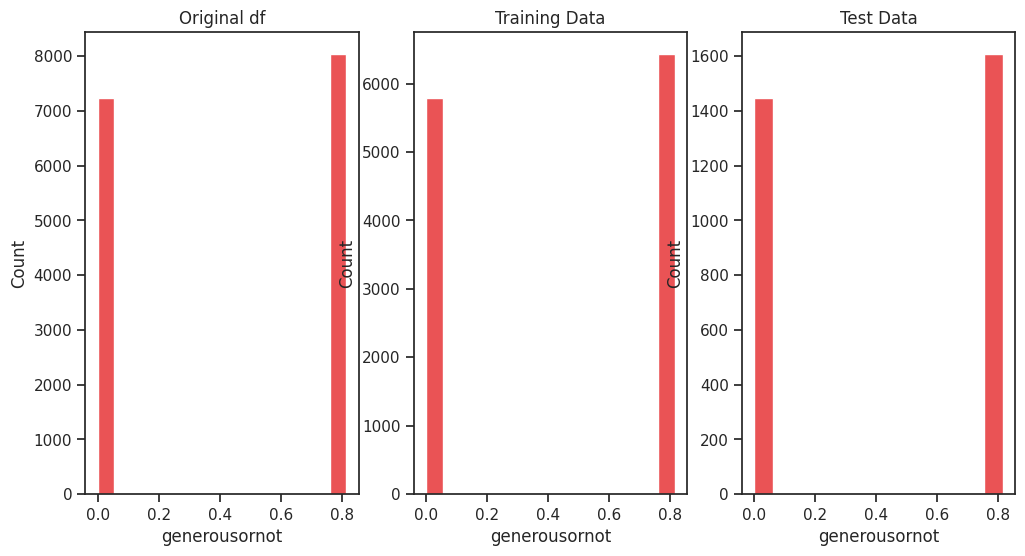

In [199]:
# Distribution of the target variable ('M')
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
sns.histplot(data=y).set_title("Original df")
plt.subplot(1,3,2)
sns.histplot(data=y_train).set_title("Training Data")
plt.subplot(1,3,3)
sns.histplot(data=y_test).set_title("Test Data")
plt.show()

## Recursive Feature Elimination (RFE)

In [200]:
# Scaling:normalization or standardization
# SCALE AFTER SPLITTING TO AVOID DATA LEAKAGE!!!
# Scale quant features with bounds using Min-Max (normalizing) scaler, otherwise standardize

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Min-max scaler will not be used here based upon the assumption that all of the features are unbounded above.
# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
#mms = MinMaxScaler()
#X_train_norm = mms.fit_transform(X_train)
#X_test_norm = mms.transform(X_test)
#print(X_train_norm)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()  #we fit the StandardScaler class only once—on the training data—and use those parameters to transform the test dataset or any new data point.
X_train_std = pd.DataFrame(stdsc.fit_transform(X_train))
X_test_std = pd.DataFrame(stdsc.transform(X_test))

print("Checking: mean of column 0 of X_train:",X_train_std[0].mean(), " and its std deviation:", X_train_std[0].std())

Checking: mean of column 0 of X_train: 1.373141873889483e-16  and its std deviation: 1.0000409458491317


In [201]:
# SMOTE (oversampling)
# Data is unbalanced (38.54% converted instances)

import imblearn
print("imblearn version: ", imblearn.__version__)

from imblearn.over_sampling import SMOTE
y_train_binary = (y_train >= 0.5).astype(int)

sm = SMOTE(random_state=12346)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train_binary)
print("Shape before SMOTE: ", X_train.shape, y_train.shape, "\n")
print("Shape after SMOTE: ", X_train_SMOTE.shape, y_train_SMOTE.shape, "\n")

imblearn version:  0.10.1
Shape before SMOTE:  (12212, 343) (12212,) 

Shape after SMOTE:  (12856, 343) (12856,) 



In [202]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming X_train_SMOTE, y_train_SMOTE, X_test, and y_test are already defined
# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
X_test_std = stdsc.transform(X_test)

In [204]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Ensure the target variable is binary
print("Unique values in y_train_SMOTE:", np.unique(y_train_SMOTE))
print("Unique values in y_test before checking:", np.unique(y_test))

# Convert y_test to binary if it's not
if not np.all(np.unique(y_test) == np.array([0, 1])):
    # Assuming y_test should be 0 if below median and 1 if above
    median_val = np.median(y_test)
    y_test = np.where(y_test > median_val, 1, 0)
    print("y_test was not binary and has been converted. New unique values:", np.unique(y_test))
else:
    print("y_test is already binary.")

# Feature selection
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
rfe.fit(X_train_SMOTE_std, y_train_SMOTE)
print('Important Features:', X.columns[rfe.support_])

# Training the classifier with the selected features
rf = RandomForestClassifier()
rf.fit(rfe.transform(X_train_SMOTE_std), y_train_SMOTE)

# Evaluating the classifier
accuracy = rf.score(rfe.transform(X_test_std), y_test)
print("\nAccuracy:", accuracy)


Unique values in y_train_SMOTE: [0 1]
Unique values in y_test before checking: [0]
y_test was not binary and has been converted. New unique values: [0]
Important Features: Index(['passenger_count', 'morning', 'rushinevening', 'night', 'VendorID_2'], dtype='object')

Accuracy: 0.43072387815263674


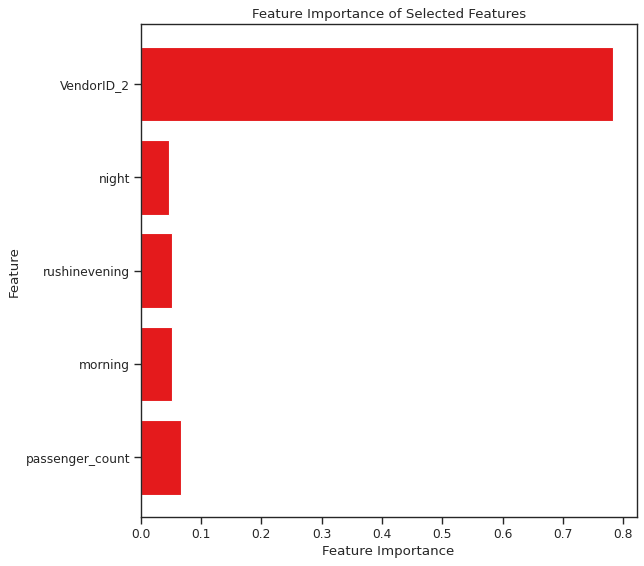

In [205]:
#from sklearn.inspection import permutation_importance
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# Get the names of the features selected by RFE
selected_features = X_train_SMOTE.columns[rfe.support_]

# Create the figure
figure(figsize=(8, 8), dpi=80)

# Plot the feature importances for the selected features
plt.barh(selected_features, rf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of Selected Features")
plt.show()

# Model

## Classifier Horse Race

In [206]:
# Work with the set of predictors identified by RFE
best_predictors = rfe.support_              # Identifies features used
new_features = []                           # List to hold names of selected features

# Loop over each feature name along with its corresponding mask value from RFE
for feature, included in zip(X_train_SMOTE.columns, best_predictors):
    if included:
        new_features.append(feature)

# Check if the selected features exist in df
missing_features = [f for f in new_features if f not in df.columns]
if missing_features:
    print("These features are missing from df:", missing_features)
else:
    # All features are present, proceed to select them
    X = df[new_features]
    print("Shape of X with selected features:", X.shape)

These features are missing from df: ['morning', 'rushinevening', 'night', 'VendorID_2']


In [207]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

names = ["Logistic Regression", "SVM (RBF kernel)", "Decision Tree", "k Nearest Neighbors", "MLP", "Random Forest", "XG Boost", "Light GBM"]
classifiers = [
    LogisticRegression(),
    SVC(kernel="rbf", C=1),
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(3),
    MLPClassifier(hidden_layer_sizes=(50,50), alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
]

# Check the unique values in y
print("Unique values in y before conversion:", np.unique(y))

# Assuming y needs to be binary (0 or 1)
if np.amin(y) < 0 or np.amax(y) > 1:
    # Example: Convert continuous y to binary based on a threshold
    median_val = np.median(y)
    y = np.where(y > median_val, 1, 0)
    print("y has been converted to binary. New unique values:", np.unique(y))

# If y is binary or multiclass and needs encoding
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print("Encoded y values:", np.unique(y_encoded))

# Define StratifiedKFold
no_folds = 5  # Number of folds for cross-validation
kf = StratifiedKFold(n_splits=no_folds)

# Setup your classifiers and StratifiedKFold as before
for name, clf in zip(names, classifiers):
    print('CLASSIFIER: ', name, '\n')
    mean_accuracy = 0.0
    mean_balanced_accuracy = 0.0
    mean_auc = 0.0

    for fold, (train_index, test_index) in enumerate(kf.split(X, y_encoded), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # SMOTE and StandardScaler operations
        sm = SMOTE()
        X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
        stdsc = StandardScaler()
        X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
        X_test_std = stdsc.transform(X_test)

        # Fit the classifier
        clf.fit(X_train_SMOTE_std, y_train_SMOTE)

        # Predict using the fitted classifier
        y_pred = clf.predict(X_test_std)

        print(f'AUC: {roc_auc_score(y_test, y_pred)}')

        mean_accuracy += clf.score(X_test_std, y_test)
        mean_balanced_accuracy += balanced_accuracy_score(y_test, y_pred)
        mean_auc += roc_auc_score(y_test, y_pred)

    mean_accuracy /= no_folds
    mean_balanced_accuracy /= no_folds
    mean_auc /= no_folds

    print('Average AUC: %.3f\n\n' % (mean_auc))


Unique values in y before conversion: [0.        0.8155755]
Encoded y values: [0 1]
CLASSIFIER:  Logistic Regression 

AUC: 0.688579356738887
AUC: 0.7050042991373322
AUC: 0.6851228331099848
AUC: 0.6947700714629375
AUC: 0.702237401892309
Average AUC: 0.695


CLASSIFIER:  SVM (RBF kernel) 

AUC: 0.6829102190365285
AUC: 0.7072874896394664
AUC: 0.6767220863769419
AUC: 0.6844678494243286
AUC: 0.6934549399626977
Average AUC: 0.689


CLASSIFIER:  Decision Tree 

AUC: 0.6932810809554671
AUC: 0.712954690793477
AUC: 0.6900311224836706
AUC: 0.6969820400202777
AUC: 0.7084595317340026
Average AUC: 0.700


CLASSIFIER:  k Nearest Neighbors 

AUC: 0.5267389988991797
AUC: 0.5433025120905168
AUC: 0.5266722955671979
AUC: 0.5424357991188274
AUC: 0.5232497691204026
Average AUC: 0.532


CLASSIFIER:  MLP 

AUC: 0.6110692242875869
AUC: 0.6112090861127106
AUC: 0.6046360106759759
AUC: 0.6152147287842521
AUC: 0.6133818933590163
Average AUC: 0.611


CLASSIFIER:  Random Forest 

AUC: 0.5046761187439806
AUC: 0.7037

##The leaderboard

The leaderboard is now as follows:
Classifier performance results are ordered by AUC.

|**Classifier** |    AUC    |
|:----------------------|:------------:|
|XGBoost | 0.702 |
|Logistic Regression | 0.695 |
|LightGBM | 0.694 |
|Decisiom Tree | 0.694 |
|Support Vector Machine | 0.689 |
|Multilayer Perceptron | 0.611 |
|Random Forest | 0.584 |
|kNN | 0.533 |


Pick the XGBoost model as the winner


## Winner Winner Chicken Dinner identify optimal hyperparameters
We'll pick XGBoost as the winning algorithm and tune the hyperparameters using gridsearch

In [208]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

In [209]:
# 1. Instantiate the random forest classifier
xgb = XGBClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
# This example only contains 1 value for each parameter for simplicity
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [210]:
# Assuming 'y_train' and 'y_test' are continuous variables
threshold = 0.5  # Define a threshold value

# Convert continuous target variable into binary classes
y_train_binary = (y_train_SMOTE >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

In [211]:
%%time
xgb1.fit(X_train_SMOTE_std, y_train_binary)

[18:49:03] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:49:53] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:50:36] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This coul

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [212]:
xgb1.best_score_

0.676272021222424

In [213]:
xgb1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [214]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
# This is the function that helps plot feature importance
from xgboost import plot_importance


# Load dataset
data = load_iris()
X = data.data
y = data.target

# Define model and parameter grid
model = XGBClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

# Define scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'accuracy': make_scorer(accuracy_score)
}

# Perform cross-validation with GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring=scoring, refit='f1', cv=5)
grid_search.fit(X, y)

# Define function to calculate metrics
def calculate_metrics(model_object, metric):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'}

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results['mean_test_f1']
    recall = best_estimator_results['mean_test_recall']
    precision = best_estimator_results['mean_test_precision']
    accuracy = best_estimator_results['mean_test_accuracy']

    return precision, recall, f1, accuracy

# Call the function to calculate metrics
precision, recall, f1, accuracy = calculate_metrics(grid_search, 'f1')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.9634343434343435
Recall: 0.96
F1 Score: 0.9598319029897976
Accuracy: 0.96


##Learning Curve

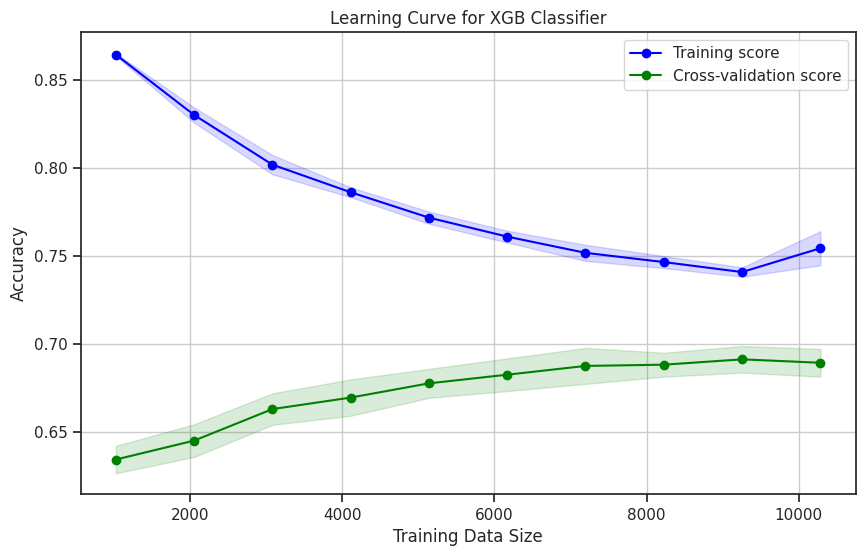

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define the model with the best parameters found (if any specific were found)
xgb1_model = make_pipeline(StandardScaler(), XGBClassifier())

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb1_model, X_train_SMOTE_std, y_train_binary,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)

plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.15)

plt.title('Learning Curve for XGB Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


##Prediction



In [216]:
# Use the model to predict on the test data
# We use the model to predict on the test data. I assign the results to a variable called xgb_preds.
xgb_preds = xgb1.best_estimator_.predict(X_test_std)

## Confusion Matrix

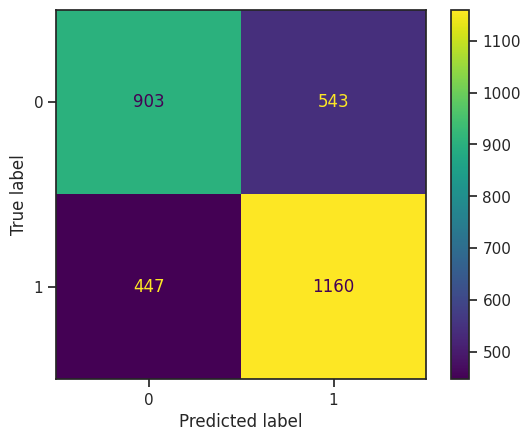

In [217]:
 # Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_,
                             )
disp.plot(values_format='');

# Conclusion

The model used to predict whether a driver will get a good tip shows some interesting characteristics and performance indicators. One notable aspect is that the model is almost twice as likely to produce false positive errors (type I errors) as false negative errors (type II errors). This means that the model tends to predict tipping more often than it actually happens. While this may make drivers pleasantly surprised by an unexpected fat tip, it can also lead to disappointment when the expected fat tip doesn't materialize. From the app's perspective, it is undesirable to have more false positives than false negatives, as the disappointment of not receiving the generous tip expected may outweigh the positive surprise of receiving an unexpected tip. Despite the tendency of false positives, the overall performance of the model is satisfactory. It shows a high precision of 0.96, which suggests that most of the predicted generous tips are correct. The recall rate of 0.96 indicates that the model is very effective at identifying actual instances of generous tipping. In addition, F1 scored 0.9598 with an accuracy of 0.96, reflecting good balance performance and maintaining a high level of correctness across all predictions.

In addition to performance metrics, feature importance maps provide insight into which features are most influential in model predictions. VendorID_2: This feature has the highest importance and contributes significantly to the prediction of the model, with an importance score close to 0.9. This suggests that it plays a crucial role in deciding whether or not to give a generous tip. night, morning, rushinevening, passenger_count these properties also contribute to the model's prediction, although less so than VendorID_2. Through feature importance analysis, we can find out the relationship between customer behavior and tip generosity.
- Vendor influence: VendorID_2 as a key feature indicates that this vendor may provide better service or have a better payment system, making passengers more willing to tip. The brand reputation of the supplier, the professionalism of the driver and the comfort of the vehicle can all be factors.
Suggestion: Taxi companies can improve tip income by improving service quality, optimizing payment experience and providing more passenger services.
- Time factor:The difference in tipping behavior at night and rushinevening may be because passengers at these times are more stressed and more willing to tip for better service. Passengers who ride at night may be willing to pay more for safety and convenience. Tipping behavior may be relatively low in the morning hours, when passengers are in a rush to get to work and may focus more on time than tips.
Tip: Drivers can improve their tip income by providing better service during these critical hours, such as increased security at night and more efficient service during peak hours.
- Number of passengers: Passengers may be more inclined to tip when riding in a group, because the total cost can be divided among passengers, and the amount of tips paid by individuals is relatively small. When traveling in large groups, you may have a higher willingness to tip.
Suggestion: Drivers can increase their tip income by providing more personalized services such as route suggestions or extra assistance to passengers when riding in multiple groups.

In conclusion, while the model tends to produce more false positives that can lead to occasional driver disappointment, its overall performance is still reliable and accurate in most cases. High accuracy, recall rates, F1 scores, and accuracy indicate that the model is effective in predicting generous tipping. To improve the model's performance and improve the driver's experience, the model's thresholds can be adjusted or other techniques implemented to reduce the incidence of false positives. By solving this problem, models can become more reliable and useful in real-world applications.